# Exploratory Data Analysis (EDA) - Insurance Risk Analytics

## Project Overview
This notebook contains the exploratory data analysis for the AlphaCare Insurance Solutions (ACIS) project. The analysis focuses on understanding the historical car insurance claim data from February 2014 to August 2015.

## Business Context
AlphaCare Insurance Solutions (ACIS) aims to optimize their marketing strategy and identify low-risk targets for premium reduction. This analysis will help in:
1. Understanding risk patterns across different segments
2. Identifying profitable customer segments
3. Optimizing premium pricing strategies
4. Improving marketing targeting

## 1. Setting Up the Environment

### Required Libraries
We'll need several Python libraries for our analysis:

1. **Data Manipulation and Analysis**
   - `pandas`: For data manipulation and analysis
   - `numpy`: For numerical computations

2. **Data Visualization**
   - `matplotlib`: For basic plotting
   - `seaborn`: For statistical visualizations
   - `plotly`: For interactive visualizations

3. **Display Settings**
   - We'll configure pandas to show all columns and more rows for better data inspection

4. **Visualization Settings**
   - We'll set a consistent style for our plots
   - Configure color palettes for better visualization

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

/tmp/ipykernel_14931/622469060.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 2. Data Loading and Initial Inspection

### Data Source
We'll be analyzing the insurance claim data from MachineLearningRating_v3.txt. The data is pipe-separated (|) and contains information about:
- Insurance policies (UnderwrittenCoverID, PolicyID)
- Transaction dates (TransactionMonth)
- Client information (IsVATRegistered, Citizenship, LegalType, etc.)
- Location data (Province, PostalCode, MainCrestaZone)
- Vehicle details (VehicleType, make, Model, etc.)
- Insurance plan details (SumInsured, Premium, CoverType, etc.)
- Claims information (TotalPremium, TotalClaims)

### Loading Process
1. We'll use pandas to read the pipe-separated file
2. Split the single column into multiple columns
3. Perform initial data inspection
4. Check basic information about the dataset

### What to Look For
- Dataset dimensions (rows and columns)
- Data types of each column
- First few rows to understand the structure
- Basic information about the dataset

In [3]:
# Load the data
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')

# Display basic information about the dataset
print("Dataset Shape:")
print(df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

# Display column names
print("\nColumn Names:")
print(df.columns.tolist())

/tmp/ipykernel_14931/1791736216.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep='|')


Dataset Shape:
(1000098, 52)

First few rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

None


Column Names:
['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


## 3. Data Quality Assessment

### Missing Values Analysis
We'll examine:
- Total number of missing values in each column
- Percentage of missing values
- Identify columns with significant missing data
- Plan for handling missing values

### Data Type Verification
- Check if all columns have appropriate data types
- Identify any columns that need type conversion
- Look for potential data type mismatches

### Duplicate Detection
- Check for duplicate rows
- Identify potential duplicate policies
- Assess the impact of duplicates on analysis

### Data Consistency Checks
- Verify date formats in TransactionMonth
- Check for inconsistent values in categorical columns
- Validate numerical ranges in premium and claim amounts

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing values
print("Columns with missing values:")
display(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Check data types
print("\nData Types:")
display(df.dtypes)

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Check for duplicate policies
duplicate_policies = df['PolicyID'].duplicated().sum()
print(f"Number of duplicate policies: {duplicate_policies}")

# Check date format
print("\nTransaction Month Format:")
print(df['TransactionMonth'].head())

# Check unique values in categorical columns
categorical_cols = ['Gender', 'Province', 'VehicleType', 'CoverType']
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts().head())

Columns with missing values:


,Missing Values,Percentage
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
Converted,641901,64.183810
Rebuilt,641901,64.183810
WrittenOff,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507



Data Types:


UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               


Number of duplicate rows: 0
Number of duplicate policies: 993098

Transaction Month Format:
0    2015-03-01 00:00:00
1    2015-05-01 00:00:00
2    2015-07-01 00:00:00
3    2015-05-01 00:00:00
4    2015-07-01 00:00:00
Name: TransactionMonth, dtype: object

Unique values in Gender:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

Unique values in Province:
Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Name: count, dtype: int64

Unique values in VehicleType:
VehicleType
Passenger Vehicle    933598
Medium Commercial     53985
Heavy Commercial       7401
Light Commercial       3897
Bus                     665
Name: count, dtype: int64

Unique values in CoverType:
CoverType
Own Damage             104183
Passenger Liability    104158
Windscreen             103763
Third Party            102825
Keys and Alarms        102428
Name: count, dtype: int64


## 4. Basic Statistics and Distributions

### Numerical Variables Analysis
We'll examine:
- Summary statistics for numerical columns
- Distribution of key metrics
- Identify any unusual patterns

### Key Metrics to Analyze
1. TotalPremium
2. TotalClaims
3. Loss Ratio (TotalClaims/TotalPremium)
4. Vehicle-related numerical features (Cylinders, cubiccapacity, kilowatts)

### What to Look For
- Central tendency measures
- Spread of the data
- Skewness and kurtosis
- Potential outliers

Summary Statistics for Numerical Variables:


,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


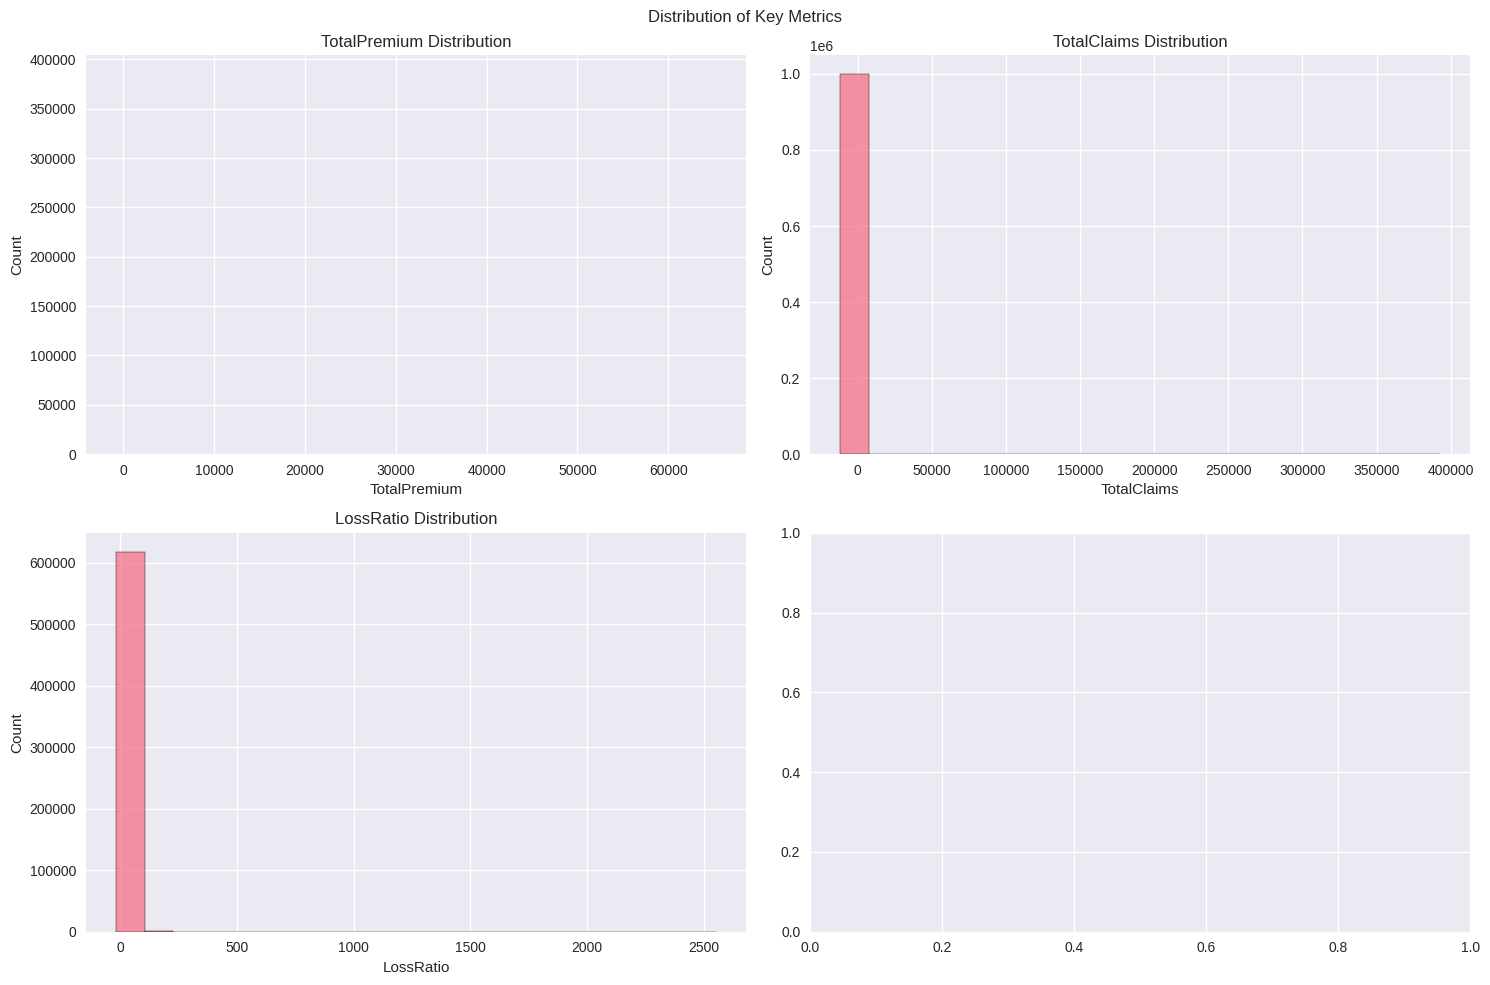

In [5]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate summary statistics
summary_stats = df[numerical_cols].describe()

# Display summary statistics
print("Summary Statistics for Numerical Variables:")
display(summary_stats)

# Calculate loss ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Plot distribution of key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Metrics')

# TotalPremium distribution
sns.histplot(data=df, x='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('TotalPremium Distribution')

# TotalClaims distribution
sns.histplot(data=df, x='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('TotalClaims Distribution')

# LossRatio distribution
sns.histplot(data=df, x='LossRatio', ax=axes[1,0])
axes[1,0].set_title('LossRatio Distribution')

plt.tight_layout()
plt.show()

## 5. Outlier Analysis

### What are Outliers?
Outliers are data points that deviate significantly from the rest of the data. In insurance data, outliers could indicate:
- Unusual claims
- Extreme premium values
- Data entry errors
- Special cases that need attention

### Methods to Detect Outliers
1. Box plots
2. Z-score method
3. IQR method
4. Visual inspection

### Key Variables to Check
- TotalPremium
- TotalClaims
- LossRatio
- Vehicle-related numerical features (Cylinders, cubiccapacity, kilowatts)

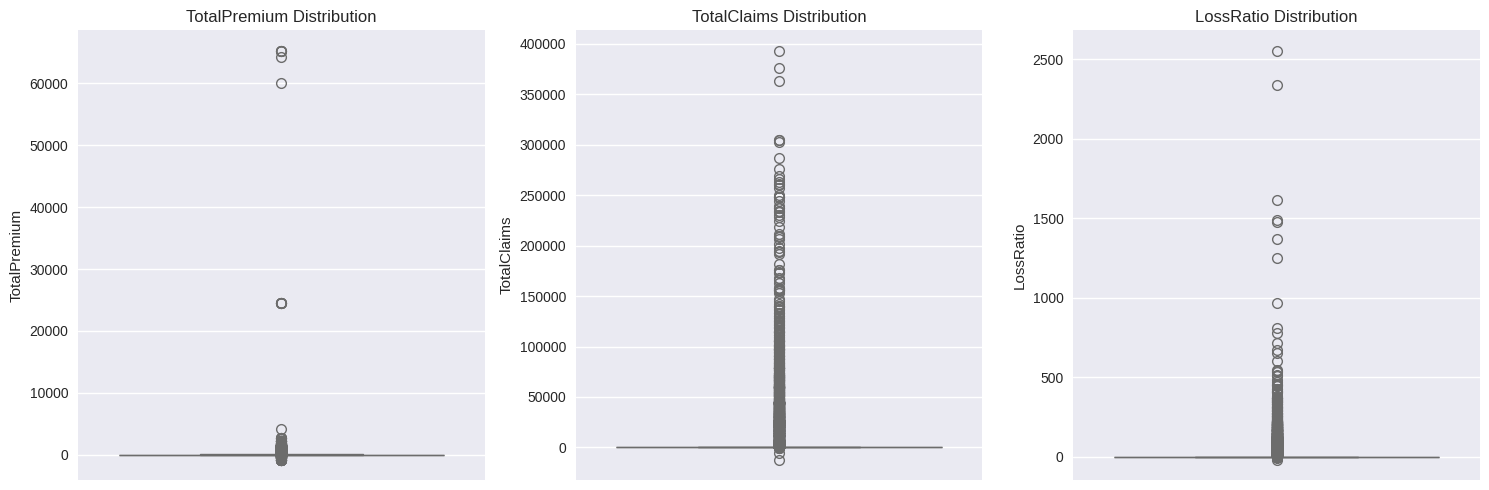


Outliers in TotalPremium:
Number of outliers: 209042
Percentage of outliers: 20.90%

Outliers in TotalClaims:
Number of outliers: 2793
Percentage of outliers: 0.28%

Outliers in LossRatio:
Number of outliers: 2793
Percentage of outliers: 0.28%


In [7]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check outliers in key metrics
key_metrics = ['TotalPremium', 'TotalClaims', 'LossRatio']

# Create box plots
plt.figure(figsize=(15, 5))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[metric])
    plt.title(f'{metric} Distribution')
plt.tight_layout()
plt.show()

# Print outlier statistics
for metric in key_metrics:
    outliers = detect_outliers(df, metric)
    print(f"\nOutliers in {metric}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")

## 6. Correlation Analysis

### Purpose
Understanding relationships between variables is crucial for:
- Identifying risk factors
- Understanding premium drivers
- Finding patterns in claims
- Feature selection for modeling

### Key Relationships to Analyze
1. Premium vs Claims
2. Vehicle characteristics vs Claims
3. Customer demographics vs Claims
4. Location factors vs Claims

### Methods
- Correlation matrices
- Scatter plots
- Heat maps

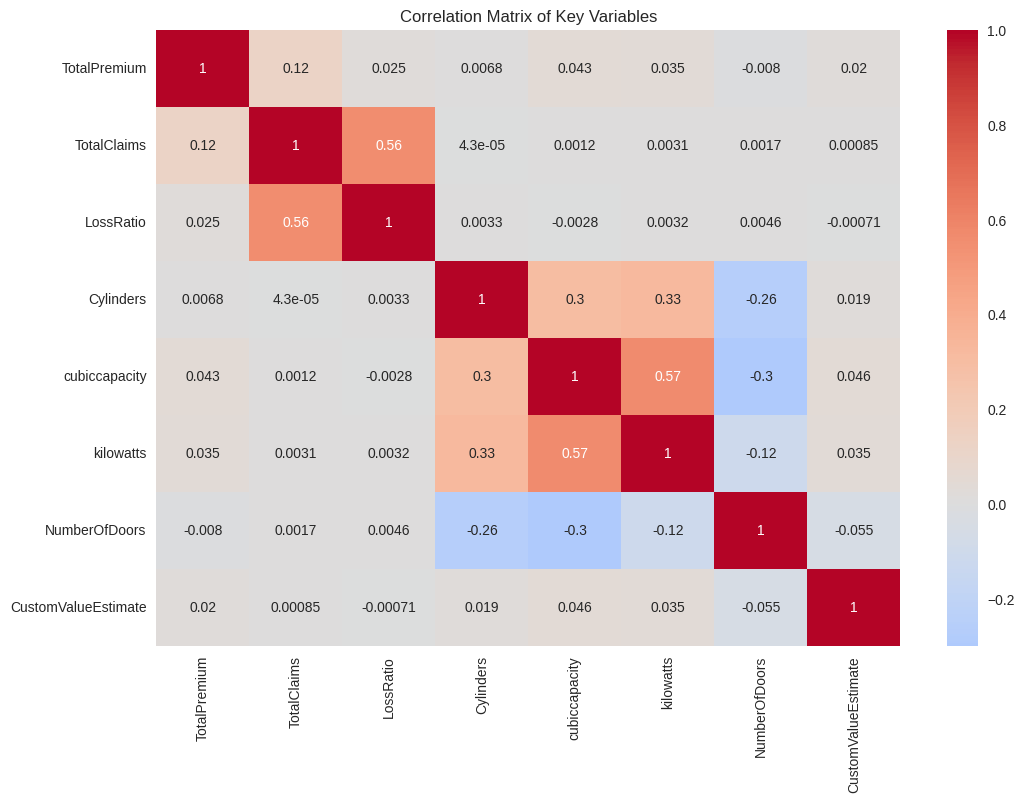

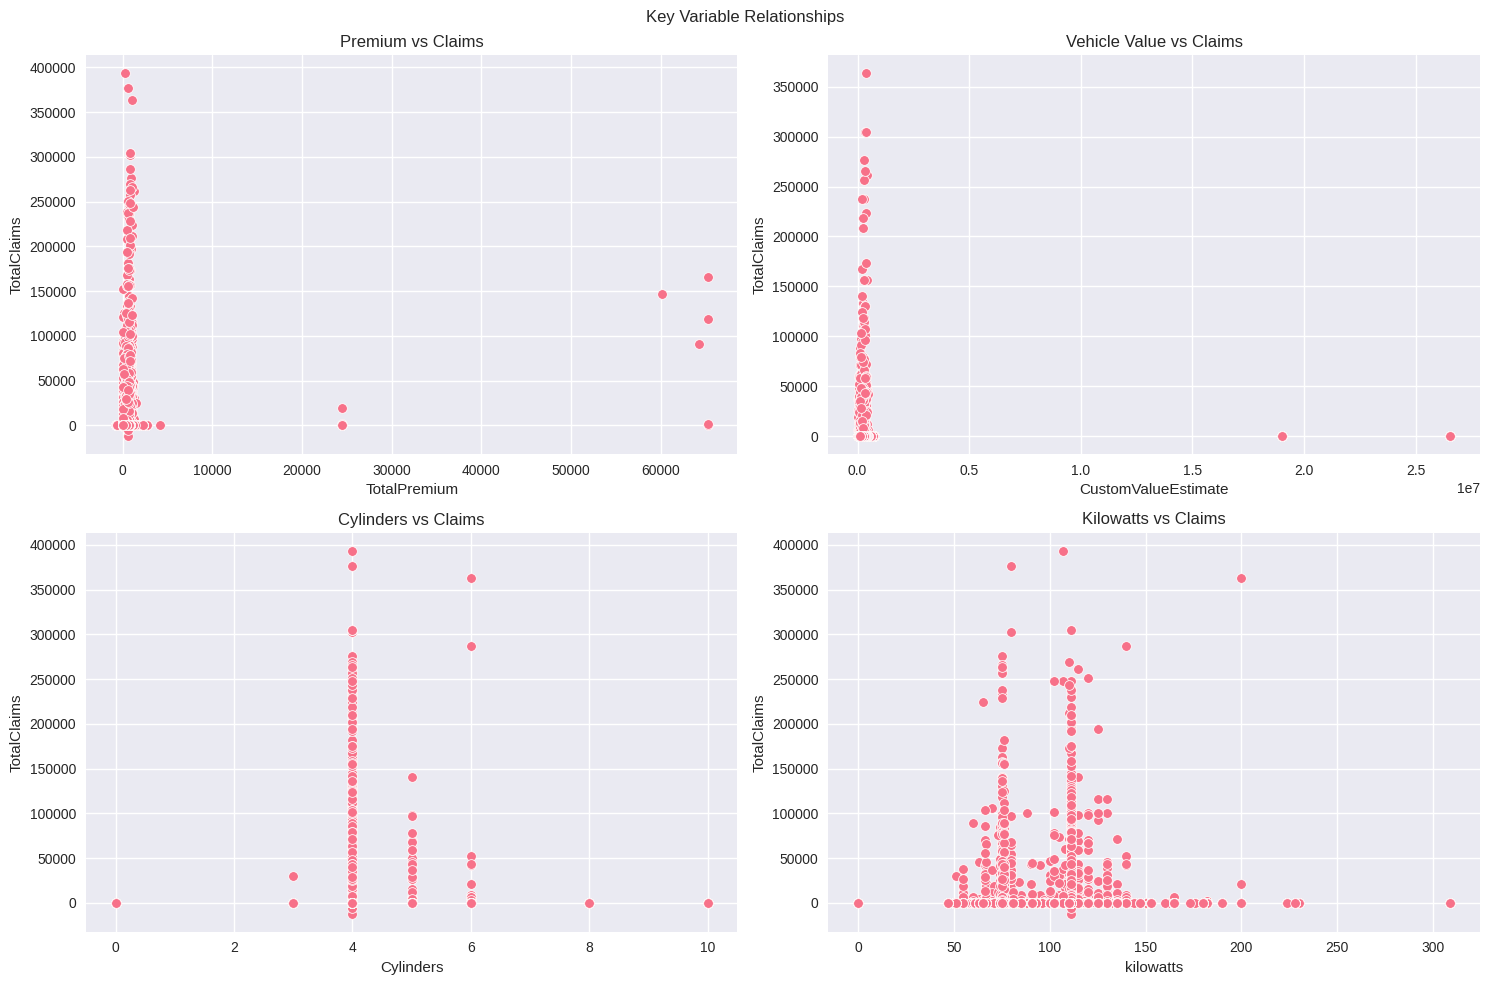

In [8]:
# Select numerical columns for correlation analysis
correlation_cols = ['TotalPremium', 'TotalClaims', 'LossRatio', 
                   'Cylinders', 'cubiccapacity', 'kilowatts', 
                   'NumberOfDoors', 'CustomValueEstimate']

# Calculate correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Create scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Variable Relationships')

# Premium vs Claims
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', ax=axes[0,0])
axes[0,0].set_title('Premium vs Claims')

# Vehicle Value vs Claims
sns.scatterplot(data=df, x='CustomValueEstimate', y='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Vehicle Value vs Claims')

# Cylinders vs Claims
sns.scatterplot(data=df, x='Cylinders', y='TotalClaims', ax=axes[1,0])
axes[1,0].set_title('Cylinders vs Claims')

# Kilowatts vs Claims
sns.scatterplot(data=df, x='kilowatts', y='TotalClaims', ax=axes[1,1])
axes[1,1].set_title('Kilowatts vs Claims')

plt.tight_layout()
plt.show()

## 7. Geographic Analysis

### Purpose
Understanding regional patterns in:
- Claim frequency
- Premium distribution
- Risk levels
- Market penetration

### Key Metrics by Region
1. Average premium by province
2. Claim frequency by province
3. Loss ratio by province
4. Vehicle distribution by region

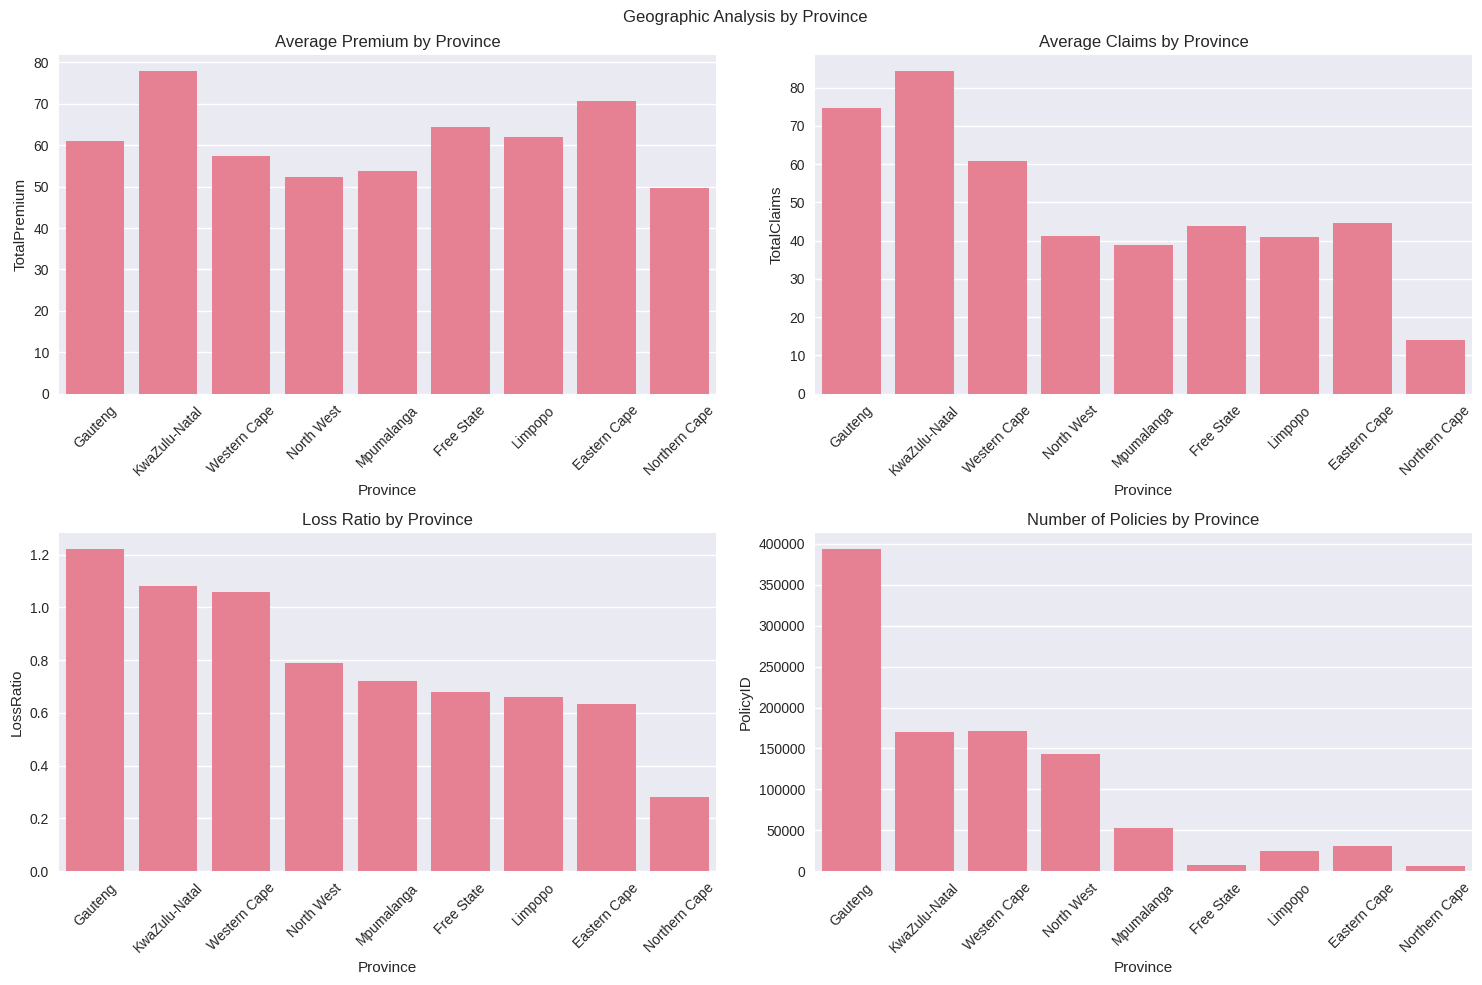

In [9]:
# Calculate key metrics by province
province_metrics = df.groupby('Province').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).reset_index()

# Calculate loss ratio by province
province_metrics['LossRatio'] = province_metrics['TotalClaims'] / province_metrics['TotalPremium']

# Sort by loss ratio
province_metrics = province_metrics.sort_values('LossRatio', ascending=False)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Geographic Analysis by Province')

# Average Premium by Province
sns.barplot(data=province_metrics, x='Province', y='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('Average Premium by Province')
axes[0,0].tick_params(axis='x', rotation=45)

# Average Claims by Province
sns.barplot(data=province_metrics, x='Province', y='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Average Claims by Province')
axes[0,1].tick_params(axis='x', rotation=45)

# Loss Ratio by Province
sns.barplot(data=province_metrics, x='Province', y='LossRatio', ax=axes[1,0])
axes[1,0].set_title('Loss Ratio by Province')
axes[1,0].tick_params(axis='x', rotation=45)

# Number of Policies by Province
sns.barplot(data=province_metrics, x='Province', y='PolicyID', ax=axes[1,1])
axes[1,1].set_title('Number of Policies by Province')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Temporal Analysis

### Purpose
Understanding how insurance metrics change over time:
- Monthly trends in claims and premiums
- Seasonal patterns
- Year-over-year comparisons
- Policy duration analysis

### Key Metrics to Analyze
1. Monthly premium trends
2. Monthly claim trends
3. Loss ratio over time
4. Policy frequency by month

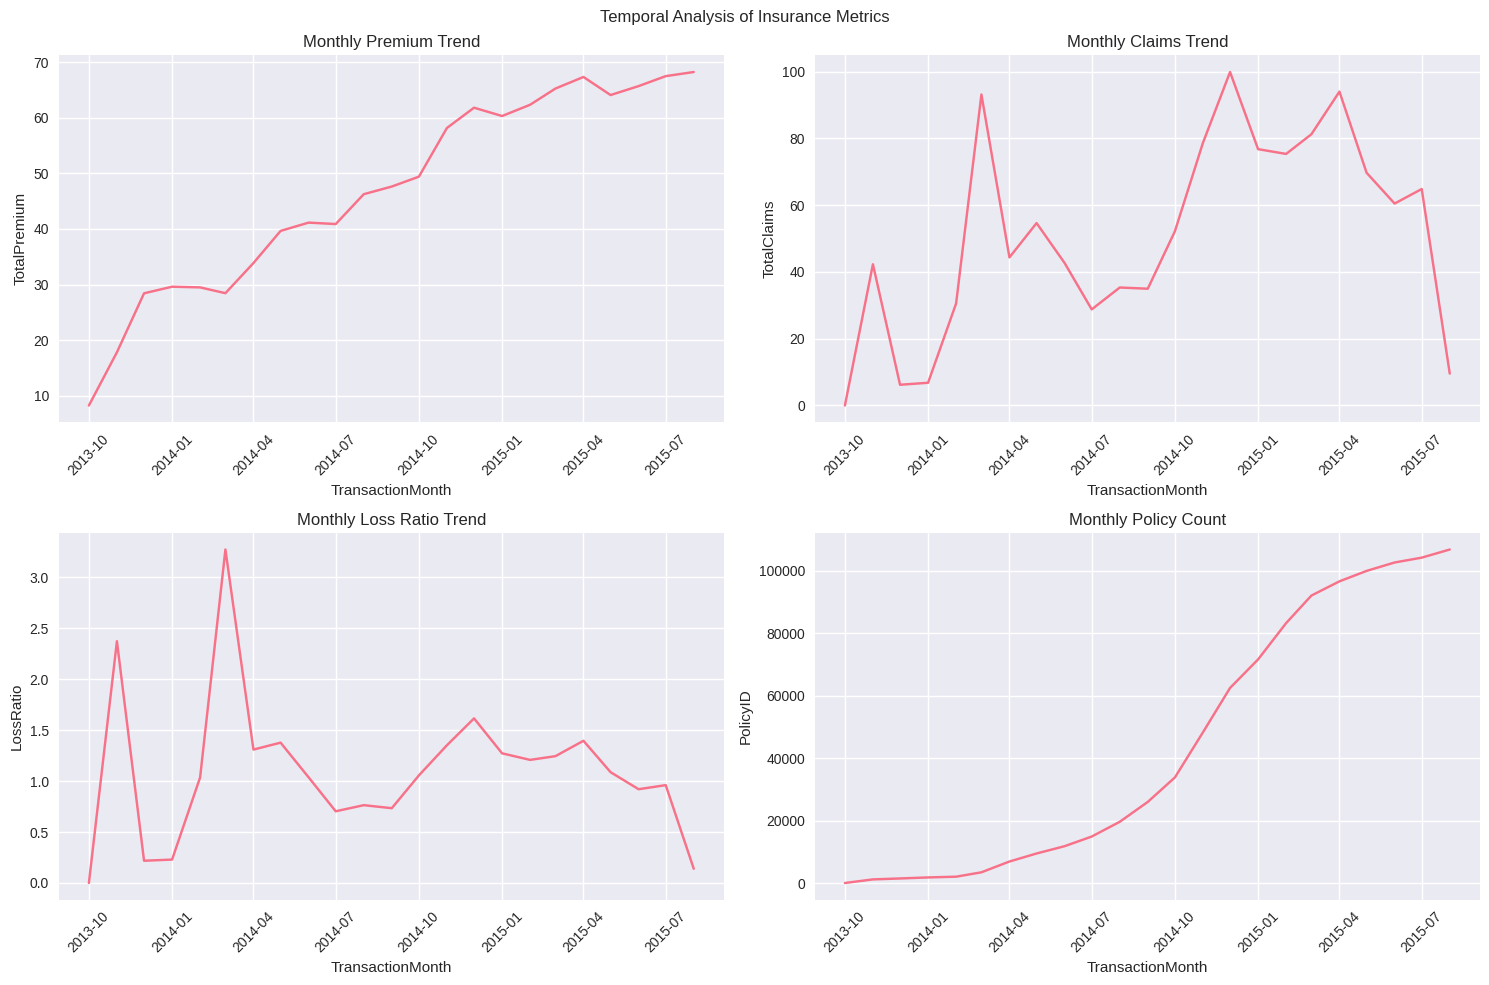

In [6]:
# Convert TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Calculate monthly metrics
monthly_metrics = df.groupby('TransactionMonth').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).reset_index()

# Calculate monthly loss ratio
monthly_metrics['LossRatio'] = monthly_metrics['TotalClaims'] / monthly_metrics['TotalPremium']

# Create time series plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temporal Analysis of Insurance Metrics')

# Monthly Premium Trend
sns.lineplot(data=monthly_metrics, x='TransactionMonth', y='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('Monthly Premium Trend')
axes[0,0].tick_params(axis='x', rotation=45)

# Monthly Claims Trend
sns.lineplot(data=monthly_metrics, x='TransactionMonth', y='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Monthly Claims Trend')
axes[0,1].tick_params(axis='x', rotation=45)

# Monthly Loss Ratio Trend
sns.lineplot(data=monthly_metrics, x='TransactionMonth', y='LossRatio', ax=axes[1,0])
axes[1,0].set_title('Monthly Loss Ratio Trend')
axes[1,0].tick_params(axis='x', rotation=45)

# Monthly Policy Count
sns.lineplot(data=monthly_metrics, x='TransactionMonth', y='PolicyID', ax=axes[1,1])
axes[1,1].set_title('Monthly Policy Count')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Vehicle Analysis

### Purpose
Understanding how vehicle characteristics affect:
- Claim frequency
- Premium amounts
- Risk levels
- Insurance patterns

### Key Variables to Analyze
1. Vehicle Type
2. Make and Model
3. Vehicle Age
4. Engine Specifications
5. Vehicle Value

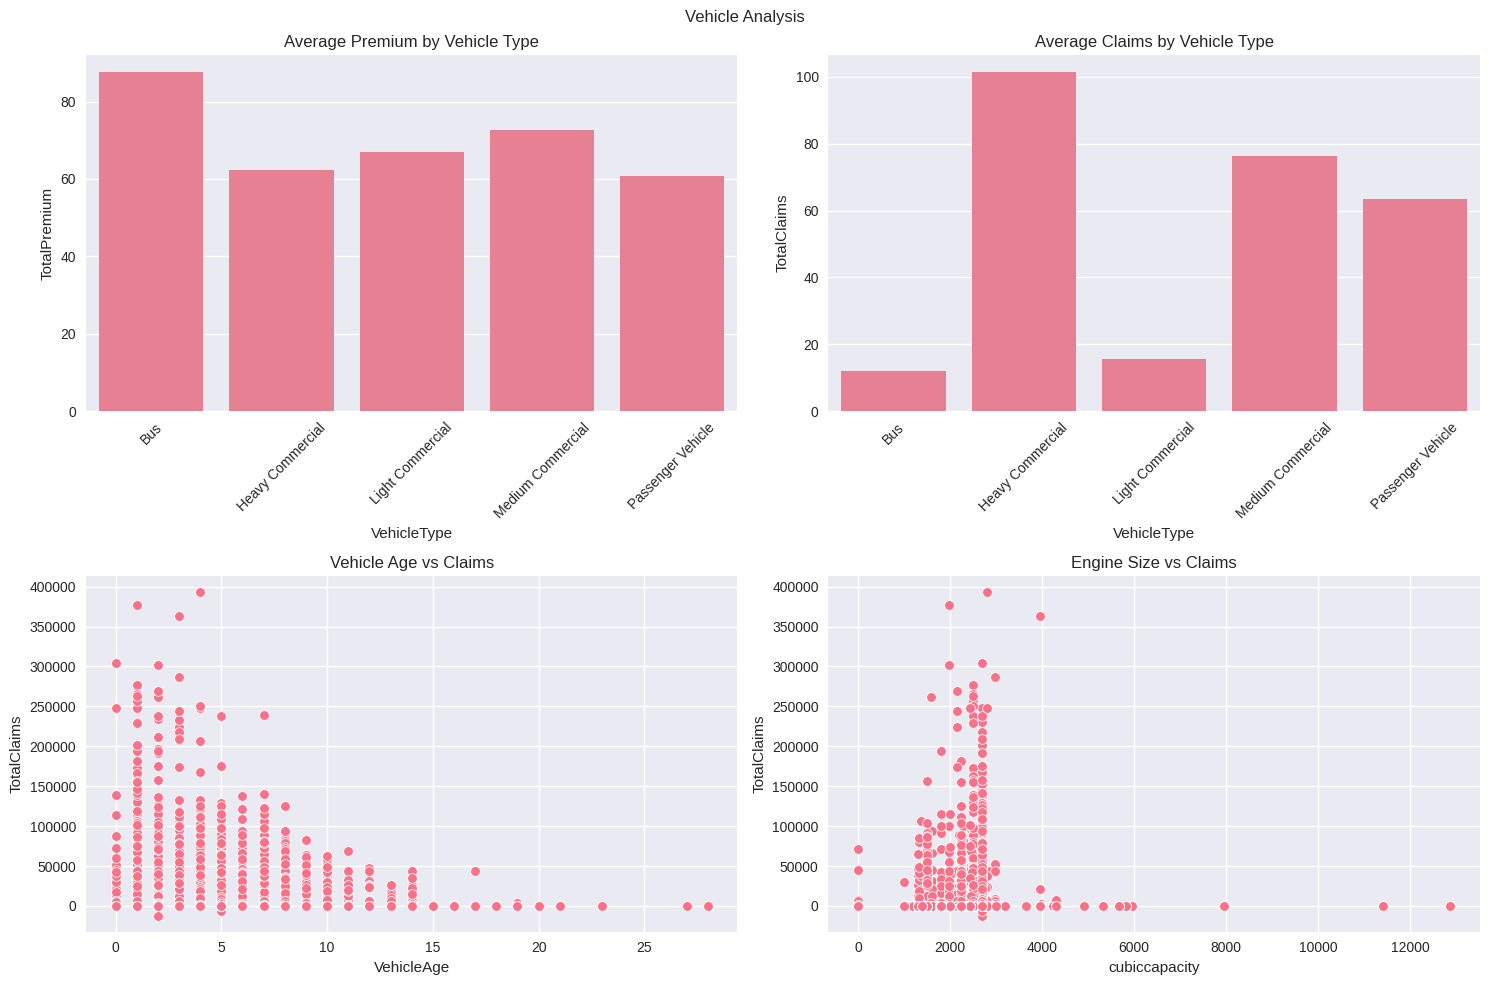


Top 10 Vehicle Makes by Number of Policies:
make
TOYOTA                                 813280
MERCEDES-BENZ                           41940
CMC                                     21624
VOLKSWAGEN                              20929
C.A.M                                   16171
GOLDEN JOURNEY                          14462
NISSAN/DATSUN                           10997
JINBEI                                  10374
IVECO                                    8430
AUDI                                     7407
Name: count, dtype: int64


In [10]:
# Calculate vehicle age
current_year = 2015  # Based on the data timeframe
df['VehicleAge'] = current_year - df['RegistrationYear']

# Vehicle type analysis
vehicle_type_metrics = df.groupby('VehicleType').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).reset_index()

vehicle_type_metrics['LossRatio'] = vehicle_type_metrics['TotalClaims'] / vehicle_type_metrics['TotalPremium']

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Vehicle Analysis')

# Premium by Vehicle Type
sns.barplot(data=vehicle_type_metrics, x='VehicleType', y='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('Average Premium by Vehicle Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Claims by Vehicle Type
sns.barplot(data=vehicle_type_metrics, x='VehicleType', y='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Average Claims by Vehicle Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Vehicle Age vs Claims
sns.scatterplot(data=df, x='VehicleAge', y='TotalClaims', ax=axes[1,0])
axes[1,0].set_title('Vehicle Age vs Claims')

# Engine Size vs Claims
sns.scatterplot(data=df, x='cubiccapacity', y='TotalClaims', ax=axes[1,1])
axes[1,1].set_title('Engine Size vs Claims')

plt.tight_layout()
plt.show()

# Top 10 makes by number of policies
top_makes = df['make'].value_counts().head(10)
print("\nTop 10 Vehicle Makes by Number of Policies:")
print(top_makes)

## 10. Customer Analysis

### Purpose
Understanding customer demographics and their impact on:
- Risk levels
- Premium amounts
- Claim patterns
- Customer segmentation

### Key Variables to Analyze
1. Gender
2. Marital Status
3. Age (if available)
4. Location
5. Banking details

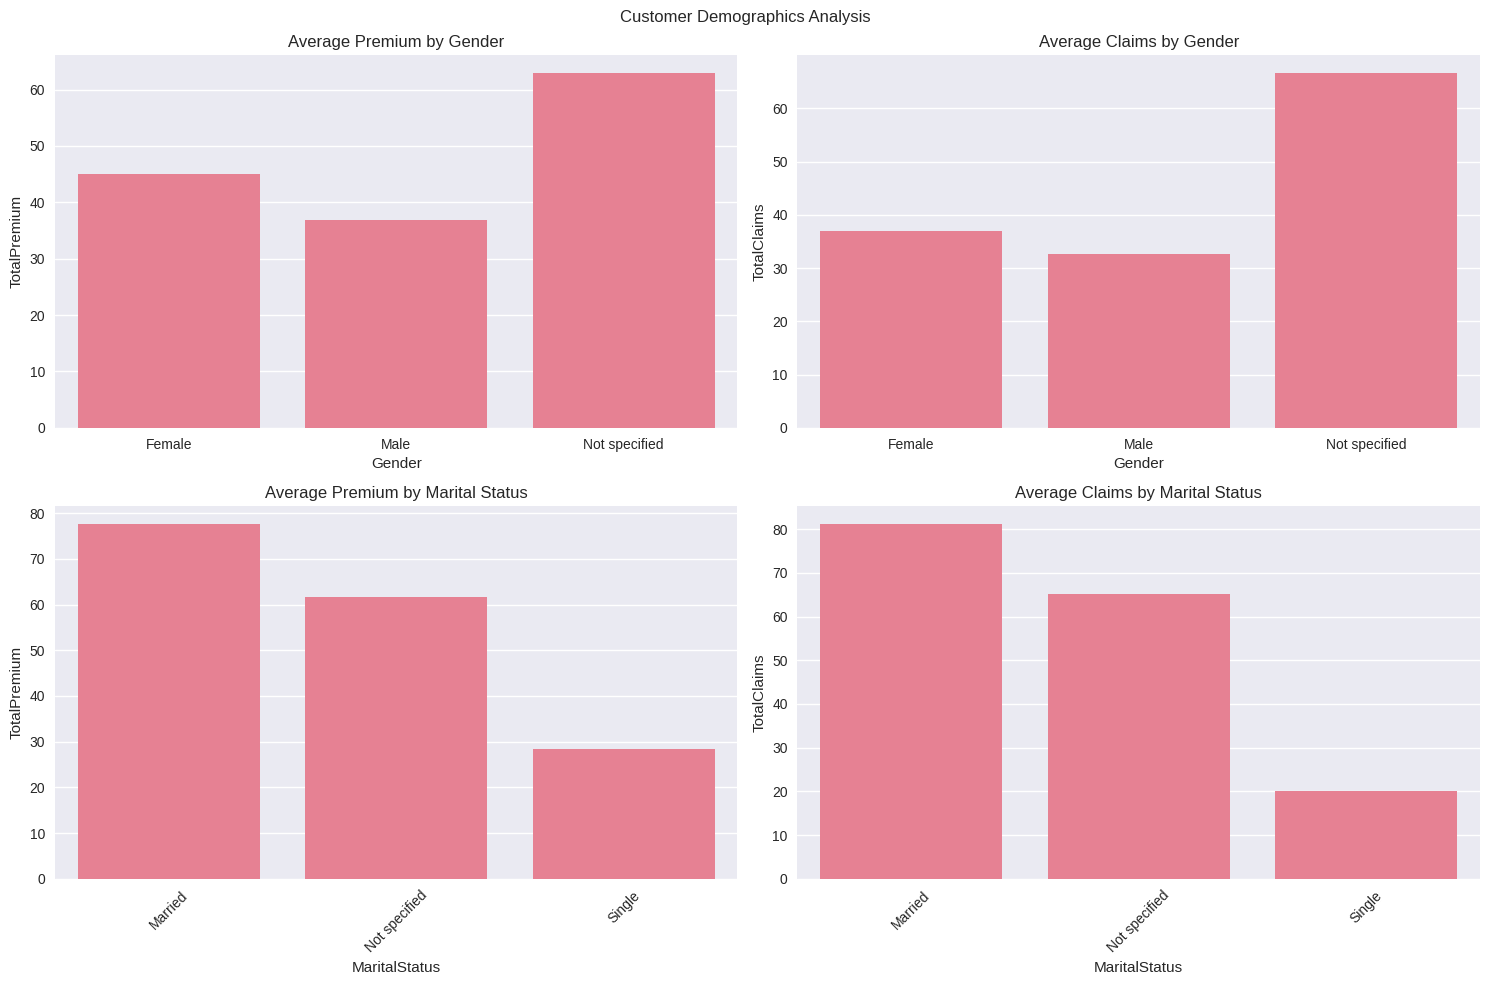


Customer Demographics Summary:

Gender Distribution:
Gender
Not specified    940990
Male              42817
Female             6755
Name: count, dtype: int64

Marital Status Distribution:
MaritalStatus
Not specified    986208
Single             4254
Married            1377
Name: count, dtype: int64


In [11]:
# Customer demographics analysis
demographic_metrics = df.groupby('Gender').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).reset_index()

demographic_metrics['LossRatio'] = demographic_metrics['TotalClaims'] / demographic_metrics['TotalPremium']

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Customer Demographics Analysis')

# Premium by Gender
sns.barplot(data=demographic_metrics, x='Gender', y='TotalPremium', ax=axes[0,0])
axes[0,0].set_title('Average Premium by Gender')

# Claims by Gender
sns.barplot(data=demographic_metrics, x='Gender', y='TotalClaims', ax=axes[0,1])
axes[0,1].set_title('Average Claims by Gender')

# Marital Status Analysis
marital_metrics = df.groupby('MaritalStatus').agg({
    'TotalPremium': 'mean',
    'TotalClaims': 'mean',
    'PolicyID': 'count'
}).reset_index()

# Premium by Marital Status
sns.barplot(data=marital_metrics, x='MaritalStatus', y='TotalPremium', ax=axes[1,0])
axes[1,0].set_title('Average Premium by Marital Status')
axes[1,0].tick_params(axis='x', rotation=45)

# Claims by Marital Status
sns.barplot(data=marital_metrics, x='MaritalStatus', y='TotalClaims', ax=axes[1,1])
axes[1,1].set_title('Average Claims by Marital Status')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCustomer Demographics Summary:")
print("\nGender Distribution:")
print(df['Gender'].value_counts())
print("\nMarital Status Distribution:")
print(df['MaritalStatus'].value_counts())

## 11. Summary of Key Findings
### Data Quality

- Several columns have very high missing values (e.g., NumberOfVehiclesInFleet, CrossBorder, CustomValueEstimate).
- Most columns have low or negligible missingness.
- No duplicate rows, but many duplicate PolicyIDs (likely due to multiple transactions per policy).
- TransactionMonth format is consistent.
- Some categorical columns (e.g., Gender) have a large proportion of "Not specified" values.
### Geographic Patterns

- Gauteng and KwaZulu-Natal have the highest average premiums, claims, and policy counts.
- Loss ratio is highest in Gauteng, indicating higher risk or more frequent/larger claims.
- Northern Cape has the lowest premiums, claims, and loss ratio.
- There are clear regional differences in both risk and business volume.

### Vehicle Insights

- Buses have the highest average premiums, but Heavy Commercial vehicles have the highest average claims.
- Most policies are for Passenger Vehicles, but commercial types show higher risk and claim amounts.
- Claims tend to decrease as vehicle age increases.
- Most claims are concentrated in vehicles with engine sizes around 2000cc.
- Toyota is by far the most common make in the portfolio.